<a href="https://colab.research.google.com/github/Geoffrey-Chege/GEOFFREY_MORINGA_IP_W9/blob/main/GEOFFREY_MORINGA_IP_W9_K_NEAREST_NEIGHBOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbor

# 1 Introduction

## 1.1 Defining the question

Predict if a passenger survived the sinking of the Titanic or not using K-Nearest neighbor

## 1.2 Metric for success

Model accuracy 80%


## 1.3 The Context

RMS Titanic was a British passenger liner, operated by the White Star Line, which sank in the North Atlantic Ocean on 15th April 1912 after striking an iceberg during her maiden voyage from Southhampton, UK, to New York City, USA.

Of the estimated 2,224 passengers and crew aboard, more than 1,500 died.

## 1.4 Experimental Design

* Loading & Viewing the Data
* Data Cleaning
* Exploratory Data Analysis
* Feature Engineering
* Modelling: K-Nearest Neighbor
* Conclusion

# 2 Importing libraries

In [7]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [8]:
!pip install pydataset
from pydataset import data

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline
import math
import requests
from io import StringIO
import pandas_profiling as pp
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, normalize, Normalizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# 3 Loading and previewing dataset

In [10]:
train = pd.read_csv('/content/train_IP_W9.csv')
test = pd.read_csv('/content/test_IP_W9.csv')

In [11]:
train.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [12]:
test.head()

PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]

In [13]:
# Checking the number of rows and columns in the train dataset

print('The train dataset has ' + str(train.shape[0]) + ' rows and ' +  str(train.shape[1]) + ' columns' )

The train dataset has 891 rows and 12 columns


In [14]:
# Checking the number of rows and columns in the dataset

print('The test dataset has ' + str(test.shape[0]) + ' rows and ' +  str(test.shape[1]) + ' columns' )

The test dataset has 418 rows and 11 columns


In [15]:
# checking the train column names

train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
# checking the test column names

test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
# Checking information about the train dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
# Checking information about the test dataset

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


There are missing values in both datasets

# 4 Data Cleaning

## Missing Values

In [19]:
# Checking null values in train

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
# Checking null values in test

test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
# Filling the missing values in the age column with mean age

train['Age']= train['Age'].fillna(train['Age'].mean(), axis = 0)

In [22]:
# Filling the missing values in the age column with mean age

test['Age']= test['Age'].fillna(test['Age'].mean(), axis = 0)

In [23]:
# Filling the missing values in the embarked column train dataset with mode

train['Embarked']= train['Embarked'].fillna(train['Embarked'].mode()[0])

In [24]:
# Filling the missing values in the embarked column train dataset with mode

train['Embarked']= train['Embarked'].fillna(train['Embarked'].mode()[0])

In [25]:
# Filling the missing values in the fare column test dataset with mode

test['Fare']= test['Fare'].fillna(test['Fare'].mode()[0])

In [26]:
# Checking null values in train

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [27]:
# Checking null values in test

test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [30]:
# checking percentage of cabin missing values in train dataset
Total = train.isnull().sum()

# Calculating percentage
percent1 = train.isnull().sum()/train.isnull().count()*100

# creating a dataframe to show the values
missing1 = pd.concat([Total, percent1], axis=1, keys=['Total', '%'])
missing1.loc[['Cabin']]

Total          %
Cabin    687  77.104377

In [31]:
# checking percentage of cabin missing values in test dataset
Total2 = test.isnull().sum()

# Calculating percentage
percent2 = test.isnull().sum()/test.isnull().count()*100

# creating a dataframe to show the values
missing2 = pd.concat([Total2, percent2], axis=1, keys=['Total', '%'])
missing2.loc[['Cabin']]

Total          %
Cabin    327  78.229665

The missing cabin data is above 75% of the data in both datasets, so I will drop the column

In [32]:
train.drop(['Cabin'], axis=1, inplace = True)

In [33]:
test.drop(['Cabin'], axis=1, inplace = True)

In [34]:
# Checking that there are no null values

train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [35]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Outliers

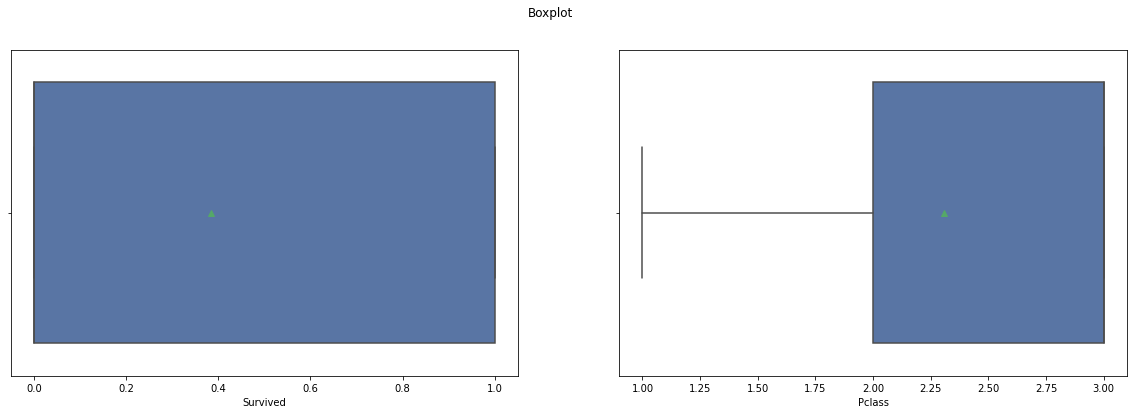

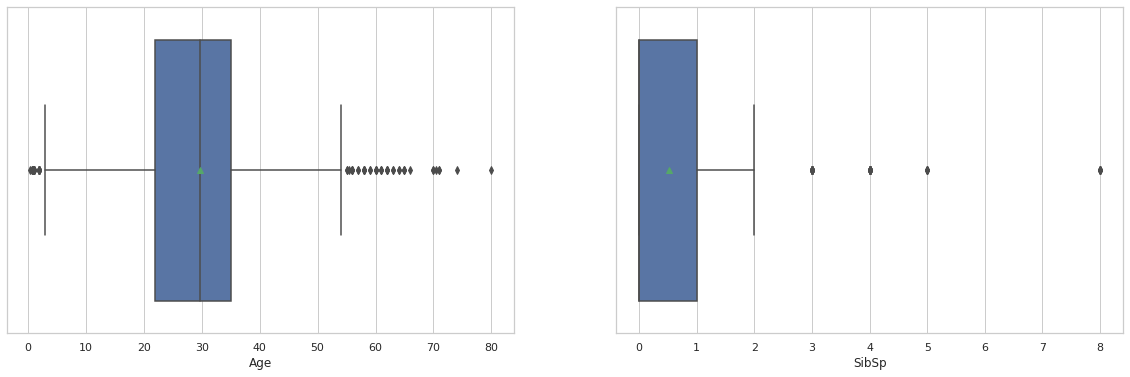

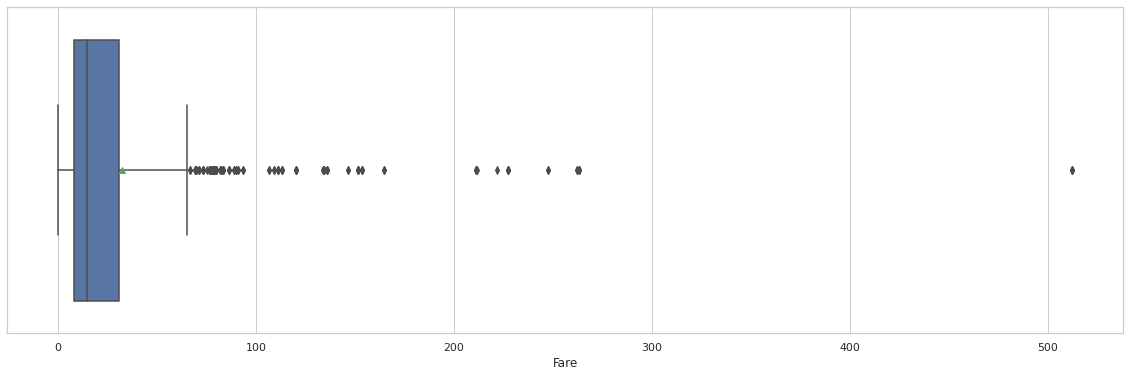

In [36]:
# Using boxplots to check for outliers in the measured values

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 6))
fig.suptitle('Boxplot')
sns.set(style = 'whitegrid', context = 'notebook')
sns.boxplot(x = train['Survived'], ax=ax1, showmeans = True)
sns.boxplot(x = train['Pclass'], ax=ax2, showmeans = True)

fig, (ax3,ax4) = plt.subplots(1,2, figsize=(20, 6))
sns.boxplot(x = train['Age'], ax=ax3, showmeans = True)
sns.boxplot(x = train['SibSp'], ax=ax4, showmeans = True)

fig, (ax5) = plt.subplots(1, figsize=(20, 6))
sns.boxplot(x = train['Fare'], ax=ax5, showmeans = True)

plt.show()

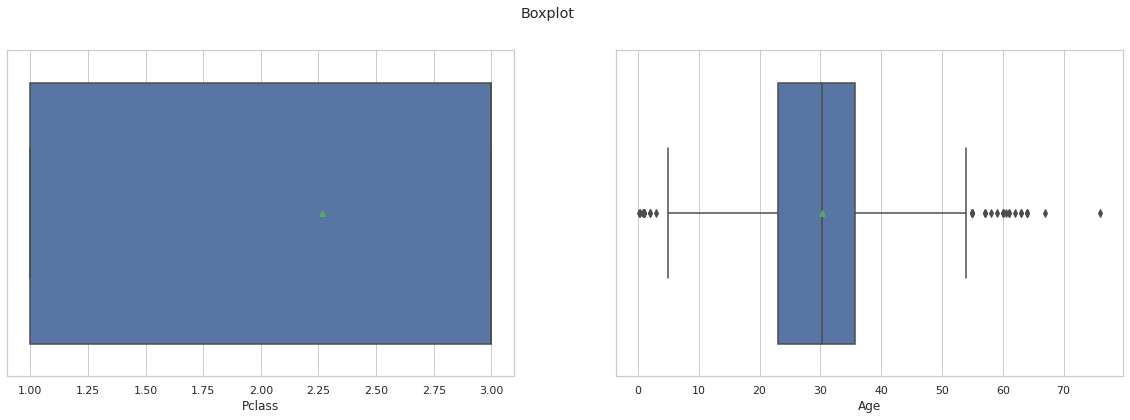

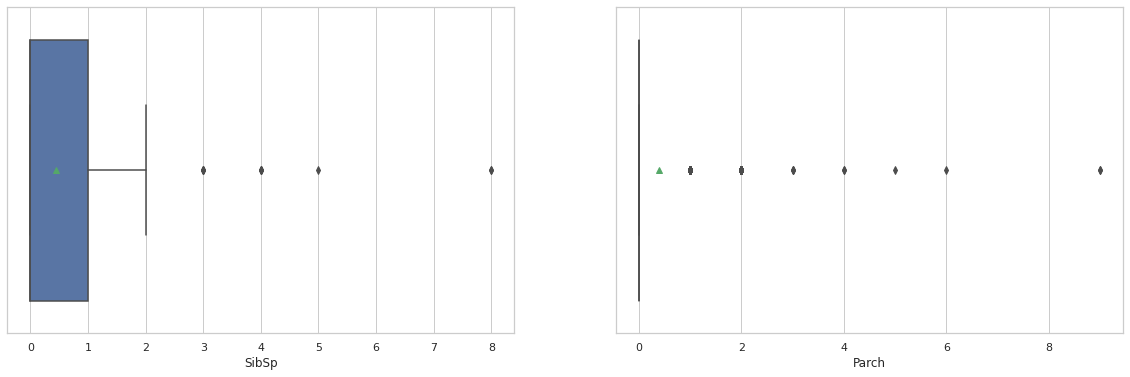

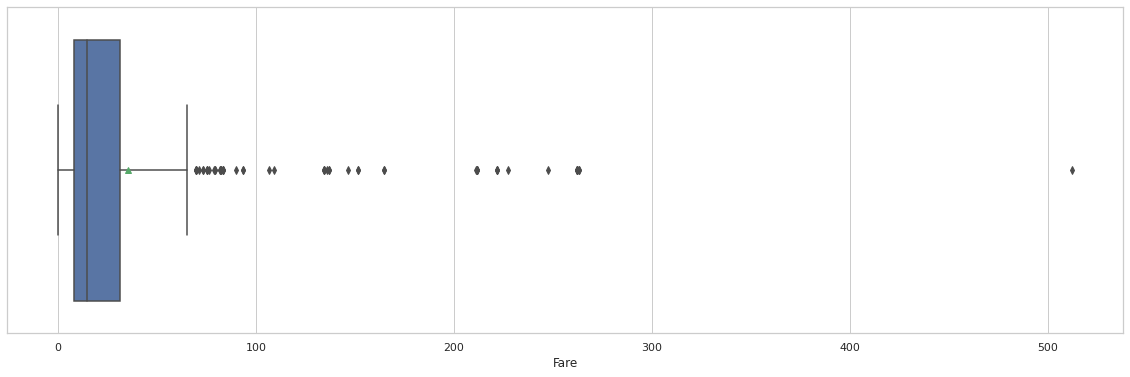

In [37]:
# Using boxplots to check for outliers in the measured values

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 6))
fig.suptitle('Boxplot')
sns.set(style = 'whitegrid', context = 'notebook')
sns.boxplot(x = test['Pclass'], ax=ax1, showmeans = True)
sns.boxplot(x = test['Age'], ax=ax2, showmeans = True)

fig, (ax3,ax4) = plt.subplots(1,2, figsize=(20, 6))
sns.boxplot(x = test['SibSp'], ax=ax3, showmeans = True)
sns.boxplot(x = test['Parch'], ax=ax4, showmeans = True)

fig, (ax5) = plt.subplots(1, figsize=(20, 6))
sns.boxplot(x = test['Fare'], ax=ax5, showmeans = True)

plt.show()

There are outliers in both datasets but I will not tackle them at this point.

# 5 Exploratory Data Analysis

In [38]:
train_report = pp.ProfileReport(train)
train_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
train.describe()

PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

In [40]:
test_report = pp.ProfileReport(test)
test_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [41]:
test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  418.000000  418.000000  418.000000  418.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.560497
std     120.810458    0.841838   12.634534    0.896760    0.981429   55.857145
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   23.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   30.272590    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   35.750000    1.000000    0.000000   31.471875
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

# 6 Feature Engineering

Sex Column
* Converting them into numeric in both datasets

In [42]:
gender = {"male":0, "female":1}

data = [train, test]

for dataset in data:
  dataset['Sex'] = dataset['Sex'].map(gender)

Embarked column
* Encoding in both datasets

In [43]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

# 7 Modelling: K-Nearest Neighbor

I don't have the label for the test set, I will use the train set to create train and test data 

In [45]:
# Survived is the target variable, so i will create a data frame for the independent variables

train_independent = train.drop(columns=['Survived', 'PassengerId', 'Name','Ticket'])
train_independent

Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]

## Splitting 80-20

In [46]:
# Splitting dataset independent and target variable

X = train_independent.values
y = train['Survived'].values

In [47]:
# Splitting dataset into training and test then training model using 80% of data and testing with 20%.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
# Feature scaling

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
# Finding the best value of k

print("The best value of k is: ", math.sqrt(len(y_test)))

The best value of k is:  13.379088160259652


In [50]:
# Fitting the KNeighbors classifier model features to the X_train and X_test then train the model

knc = KNeighborsClassifier(n_neighbors=13)
knc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [51]:
# Predictions based on test

y_pred = knc.predict(X_test)

In [52]:
# Evaluating the algorithm

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Model accuracy: ",(accuracy_score(y_test, y_pred))*100)

[[101   9]
 [ 22  47]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       110
           1       0.84      0.68      0.75        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179

Model accuracy:  82.68156424581005


Splitting 80-20 gave an accuracy of 82.68%

## Splitting 70-30

In [53]:
# Splitting dataset independent and target variable

X = train_independent.values
y = train['Survived'].values

In [54]:
# Splitting dataset into training and test then training model using 70% of data and testing with 30%.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [55]:
# Feature scaling

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# Finding the best value of k

print("The best value of k is: ", math.sqrt(len(y_test)))

The best value of k is:  16.3707055437449


In [59]:
# Fitting the KNeighbors classifier model features to the X_train and X_test then train the model

knc = KNeighborsClassifier(n_neighbors=16)
knc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [60]:
# Predictions based on test

y_pred = knc.predict(X_test)

In [61]:
# Evaluating the algorithm

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Model accuracy: ",(accuracy_score(y_test, y_pred))*100)

[[154  14]
 [ 33  67]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       168
           1       0.83      0.67      0.74       100

    accuracy                           0.82       268
   macro avg       0.83      0.79      0.80       268
weighted avg       0.82      0.82      0.82       268

Model accuracy:  82.46268656716418


Splitting 70-30 gave an accuracy of 82.46%

## Splitting 60-40

In [62]:
# Splitting dataset independent and target variable

X = train_independent.values
y = train['Survived'].values

In [63]:
# Splitting dataset into training and test then training model using 80% of data and testing with 20%.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [64]:
# Feature scaling

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
# Finding the best value of k

print("The best value of k is: ", math.sqrt(len(y_test)))

The best value of k is:  18.894443627691185


In [66]:
# Fitting the KNeighbors classifier model features to the X_train and X_test then train the model

knc = KNeighborsClassifier(n_neighbors=18)
knc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

In [67]:
# Predictions based on test

y_pred = knc.predict(X_test)

In [68]:
# Evaluating the algorithm

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Model accuracy: ",(accuracy_score(y_test, y_pred))*100)

[[201  20]
 [ 47  89]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       221
           1       0.82      0.65      0.73       136

    accuracy                           0.81       357
   macro avg       0.81      0.78      0.79       357
weighted avg       0.81      0.81      0.81       357

Model accuracy:  81.23249299719888


Splitting 80-20 gave an accuracy of 81.23%

* 80-20 split Model accuracy: 82.68%
* 70-30 split Model accuracy: 82.46%
* 60-40 split Model accuracy: 81.23%

80-20 split had the highest accuracy.

# 8 Conclusion

The Metric for success was achieved with all 3 models, 80-20 split having the highest accuracy out of the 3.